## Exoplanets homework \#1

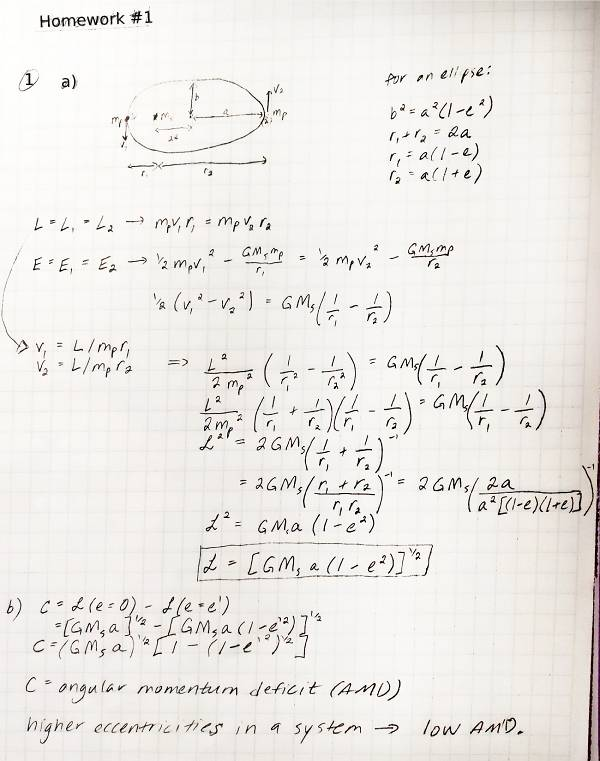

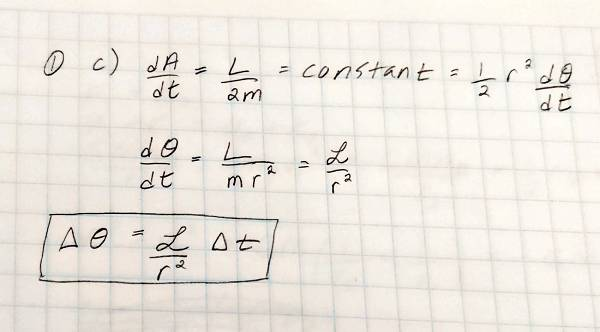

## Question 1d:

Orbital code:

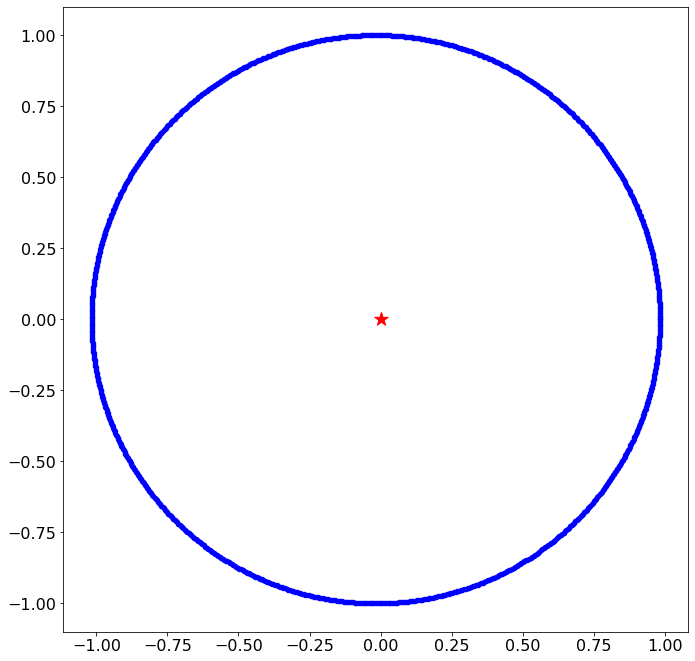

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import astropy.units as u
import astropy.constants as consts
from astropy.modeling import models, fitting
from scipy.optimize import curve_fit

G = consts.G  # gravitational constant
M = consts.M_sun  # using M_sun for M_star
a = 1 * u.AU  # semimajor axis (Earth value)
e = 0.01671  # orbital eccentricity (Earth value)

# specific angular momentum (Ell = L/m)
def calc_Ell(a,e,M):
  return (G * M * a * (1 - e**2))**(1/2)
Ell = calc_Ell(a,e,M)

def dtheta(Ell, r, dt):
    return (Ell / (r**2)) * dt * u.rad

def r(a, e, theta):
    return (a * (1 - e**2)) / (1 + e * np.cos(theta))

def calc_period(a, M):
    return ((4 * np.pi**2 * a**3)/(G * M))**0.5

t0 = 0. * u.day
tf = calc_period(a, M).to(u.day)
times = np.linspace(t0, tf, 1000)
dt = times[1] - times[0]
theta = 0. * u.rad
r1 = a * (1 - e)  # r0 at periastron
r_vals = []
x_vals=[]
y_vals=[]
theta_vals = []

plt.rcParams["figure.figsize"] = [11.50, 11.50]
plt.rcParams.update({'font.size': 16})
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')

for i in times:
    r_vals.append(r1)
    theta_vals.append(theta)
    x_vals.append(r1 * np.cos(theta))
    y_vals.append(r1 * np.sin(theta))
    theta = theta + dtheta(Ell, r1, dt)  # new theta
    r1 = r(a, e, theta)  # new radius
    
plt.scatter(x_vals*u.AU, y_vals*u.AU, color='blue', s=20)
plt.scatter(0, 0, color='red', marker='*', s=200)
plt.show()

## Question 2a:

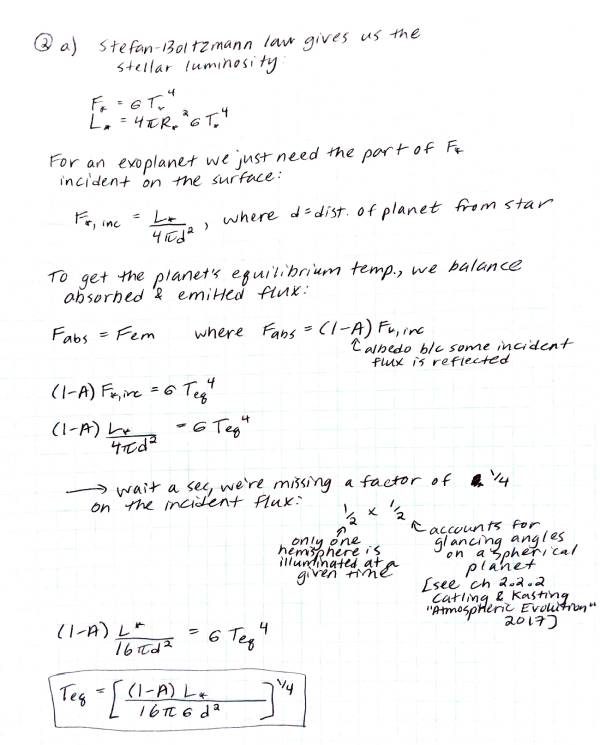

## Question 2b:

Using my birthday as a fraction of the year gives an eccentricity of $63/365 = 0.17$.

## Question 2c:

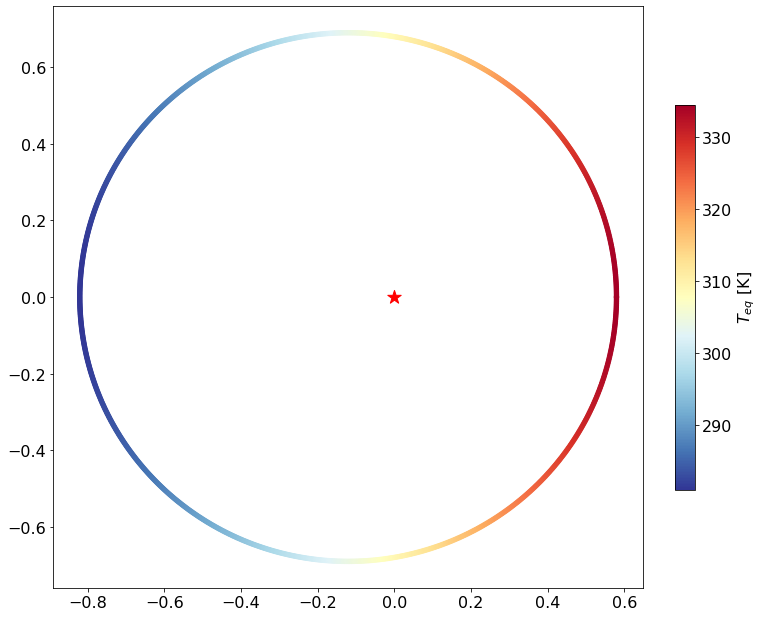

In [ ]:
A = 0.3  # albedo
L = consts.L_sun  # stellar luminosity
a = 0.7 * u.AU  # new semimajor axis -- 0.7 AU rather than 0.8 AU per sarah's update
e = 63/365  # new eccentricity (from my birthday)
Ell = calc_Ell(a,e,M)  # new specific angular momentum

def calc_temp(L, r, A):
  return ((1 - A) * L/(16 * np.pi * consts.sigma_sb * r**2))**(1/4)

t0 = 0. * u.day
tf = calc_period(a, M).to(u.day)
times = np.linspace(t0, tf, 1000)
dt = times[1] - times[0]
theta = 0. * u.rad
r1 = a * (1 - e)  # r0 at periastron
r_vals = []
x_vals=[]
y_vals=[]
theta_vals = []
temp_vals = []
colortemp_vals=[]

plt.rcParams["figure.figsize"] = [11.50, 11.50]
plt.rcParams.update({'font.size': 16})
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')

for i in times:
    r_vals.append(r1)
    theta_vals.append(theta)
    x_vals.append(r1 * np.cos(theta))
    y_vals.append(r1 * np.sin(theta))
    temp_vals.append(calc_temp(L,r1,A))
    colortemp_vals.append(calc_temp(L,r1,A).decompose()/u.K)  # remove units for plotting colorbar
    theta = theta + dtheta(Ell, r1, dt)  # new theta
    r1 = r(a, e, theta)  # new radius

temp_plot=plt.scatter(x_vals*u.AU, y_vals*u.AU, c=colortemp_vals, s=20, cmap='RdYlBu_r')
plt.scatter(0, 0, color='red', marker='*', s=200)
plt.colorbar(temp_plot,label='$T_{eq}$ [K]',fraction=0.03, pad=0.05)
plt.show()

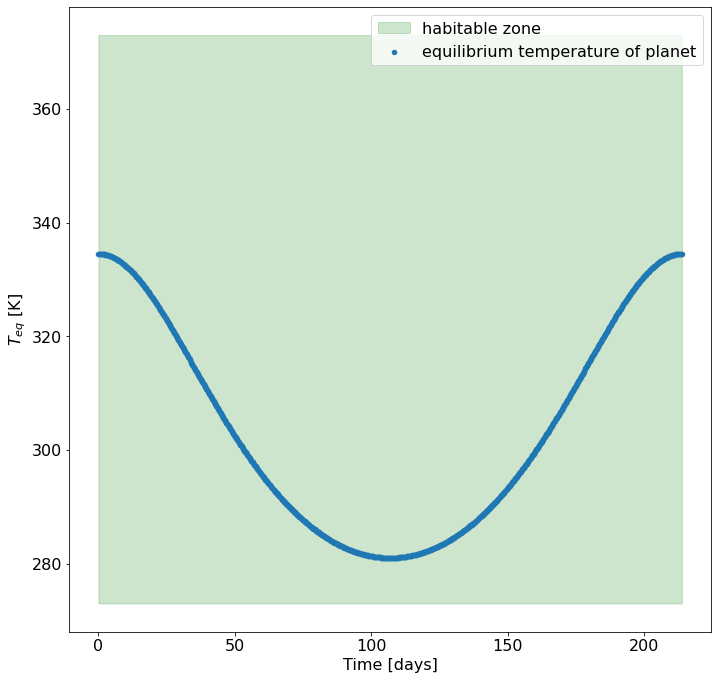

In [ ]:
# habitable range: 273 K to 373 K

plt.fill_between(times, 273, 373, color='g', alpha=0.2, label='habitable zone')
plt.scatter(times, temp_vals * u.K, label='equilibrium temperature of planet', s=20)
plt.xlabel('Time [days]')
plt.ylabel('$T_{eq}$ [K]')
plt.legend()

My exoplanet does not exit the habitable zone at any point during its orbit.


## Question 2d:

I got pretty lucky with an early birthday; my planet's orbit is not very eccentric and stays within the habitable zone the whole time. I've adjusted the semi-major axis back to $a = 0.8 ~ \mathrm{AU}$ to make things more interesting. With this value, my planet does exit the habitable zone for a time, becoming too cold as it approaches and leaves apastron.

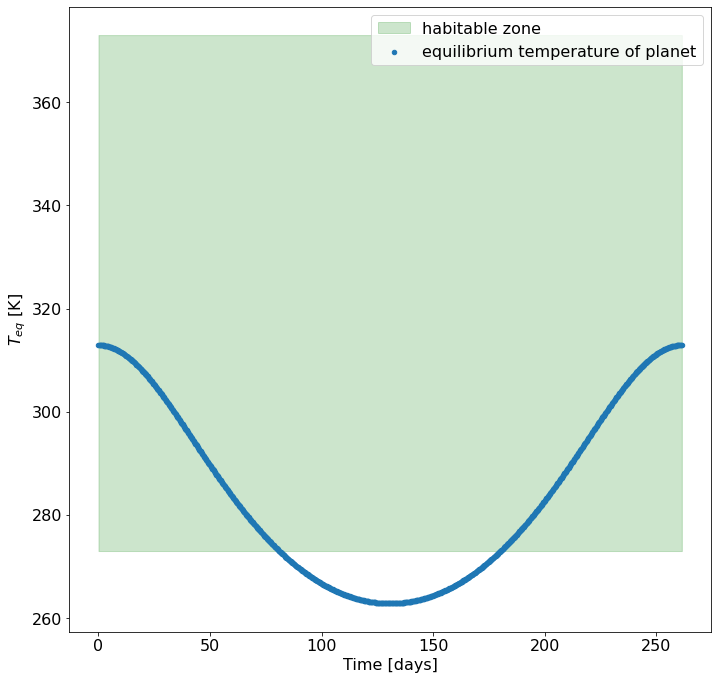

In [ ]:
# instantaneous temperature

a = 0.8 * u.AU
Ell = calc_Ell(a,e,M)  # new specific angular momentum

t0 = 0. * u.day
tf = calc_period(a, M).to(u.day)
times = np.linspace(t0, tf, 1000)
dt = times[1] - times[0]
theta = 0. * u.rad
r1 = a * (1 - e)  # r0 at periastron
r_vals = []
x_vals=[]
y_vals=[]
theta_vals = []
temp_vals = []
colortemp_vals=[]

plt.rcParams["figure.figsize"] = [11.50, 11.50]
plt.rcParams.update({'font.size': 16})
fig = plt.figure()

for i in times:
    r_vals.append(r1)
    theta_vals.append(theta)
    x_vals.append(r1 * np.cos(theta))
    y_vals.append(r1 * np.sin(theta))
    temp_vals.append(calc_temp(L,r1,A))
    colortemp_vals.append(calc_temp(L,r1,A).decompose()/u.K)  # remove units for plotting colorbar
    theta = theta + dtheta(Ell, r1, dt)  # new theta
    r1 = r(a, e, theta)  # new radius

plt.fill_between(times, 273, 373, color='g', alpha=0.2, label='habitable zone')
plt.scatter(times, temp_vals * u.K, label='equilibrium temperature of planet', s=20)
plt.xlabel('Time [days]')
plt.ylabel('$T_{eq}$ [K]')
plt.legend()

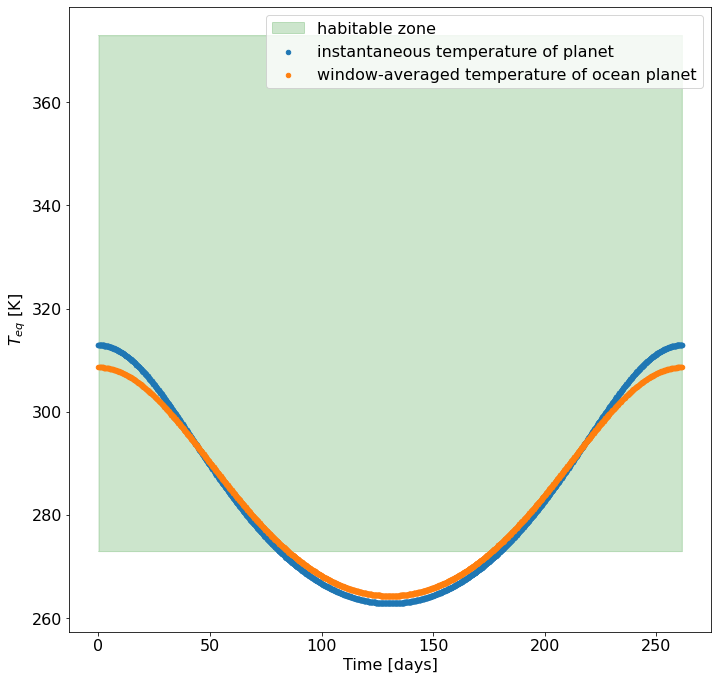

In [ ]:
# model heat capacity of liquid water surface (bin every 2-3 months)

window = tf/4  # say window is about 1/4 of a year
window_size = int(np.floor(window/dt))

# use pandas dataframe for window-averaging
import pandas as pd
df = pd.DataFrame()
df['times'] = times/u.d
df['temp_vals'] = temp_vals*u.K
df = pd.concat([df, df])

plt.fill_between(df.times, 273, 373, color='g', alpha=0.2, label='habitable zone')
plt.scatter(df.times, df.temp_vals*u.K, label='instantaneous temperature of planet', s=20)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temp_vals*u.K, label='window-averaged temperature of ocean planet', s=20)
plt.xlabel('Time [days]')
plt.ylabel('$T_{eq}$ [K]')
plt.legend()
plt.show()

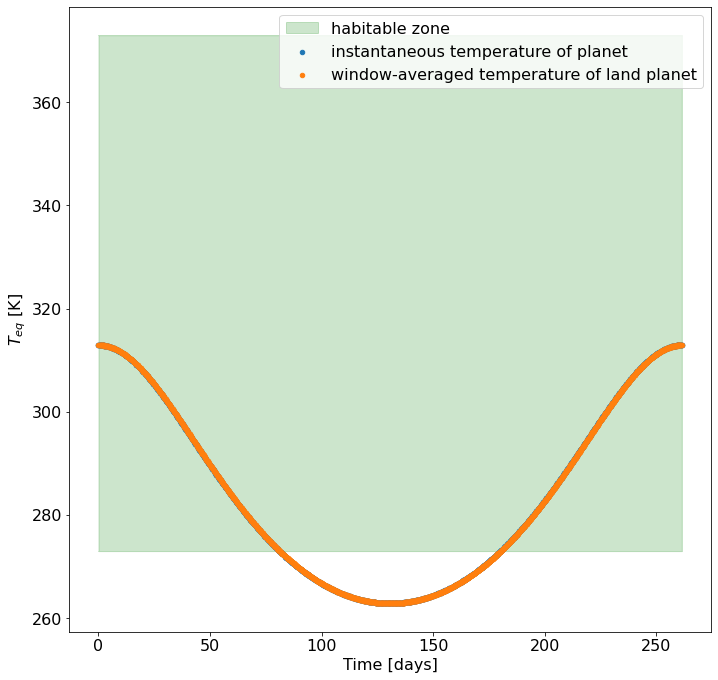

In [ ]:
# land planet = reduce binning 40x (per Table 1 from Dressing et al. [2010])
window=tf/4/40
window_size = int(np.floor(window/dt))

# use pandas
import pandas as pd
df = pd.DataFrame()
df['times'] = times/u.d
df['temp_vals'] = temp_vals*u.K
df = pd.concat([df, df])

plt.fill_between(df.times, 273, 373, color='g', alpha=0.2, label='habitable zone')
plt.scatter(df.times, df.temp_vals*u.K, label='instantaneous temperature of planet', s=20)
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temp_vals*u.K, label='window-averaged temperature of land planet', s=20)
plt.xlabel('Time [days]')
plt.ylabel('$T_{eq}$ [K]')
plt.legend()
plt.show()

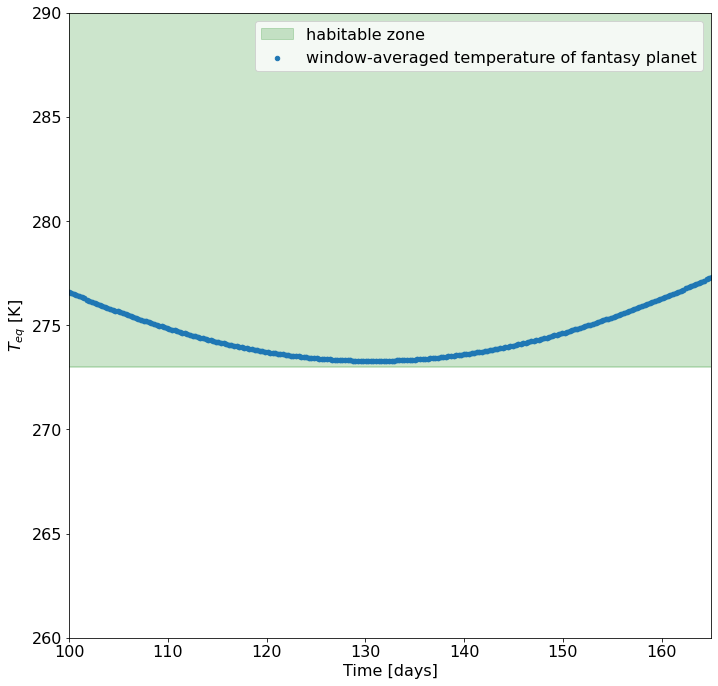

In [ ]:
# how to stay entirely within habitable zone:
# the most elegant way to do this problem would be to iterate over increasingly large window_sizes until the minimum temperature average is at least 273 K
# but I don't have time to figure out how to do that right now, so we'll just do it by eye, lmao
window=tf/1.5
window_size = int(np.floor(window/dt))

# use pandas
import pandas as pd
df = pd.DataFrame()
df['times'] = times/u.d
df['temp_vals'] = temp_vals*u.K
df = pd.concat([df, df])

plt.fill_between(df.times, 273, 373, color='g', alpha=0.2, label='habitable zone')
plt.scatter(df.times, df.rolling(window_size, center=True).mean().temp_vals*u.K, label='window-averaged temperature of fantasy planet', s=20)
plt.xlabel('Time [days]')
plt.ylabel('$T_{eq}$ [K]')
plt.ylim(260,290)
plt.xlim(100,165)
plt.legend()
plt.show()

This delay window has to cover about two-thirds of the entire orbital period for the planet to remain in the habitable zone. This means the surface material has to have a heat capacity about three times that of a surface ocean. Only hydrogen gas fits this requirement. Hydrogen-rich atmospheres could extend the habitability of an exoplanet that would otherwise be too cold during certain points of the year; see Seager, S. (2013), "Exoplanet habitability," *Science* 340, 577--581.

## Question 3a:

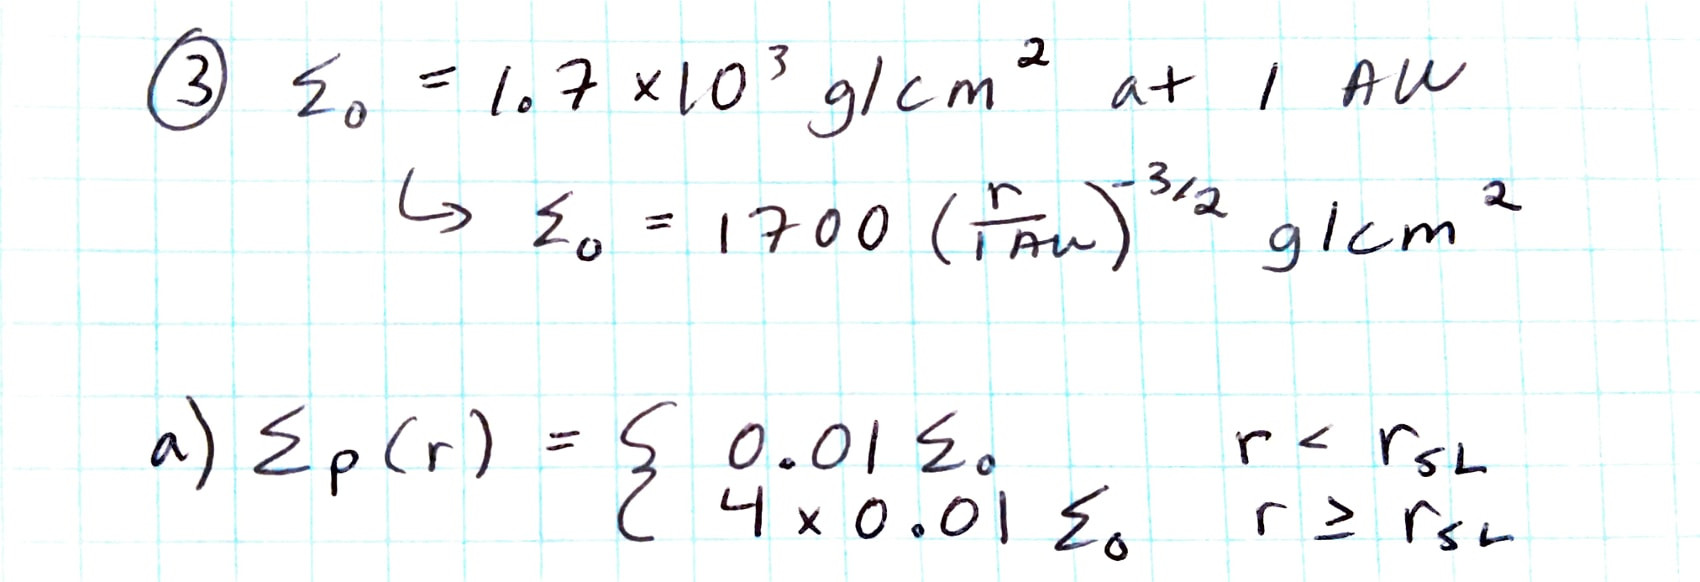

In [ ]:
sigma0 = 1.7e3 * u.g / u.cm**2
r_SL = 2.7 * u.AU  # snowline radius (5 AU for our current solar system, but 2.7 AU during formation)

def calc_sigma(r):
  if (r < r_SL) & (r > 0):
    return 0.01 * (r / u.AU)**(-3/2) * sigma0
  elif (r >= r_SL):
    return 0.04 * (r / u.AU)**(-3/2) * sigma0

## Question 3b:

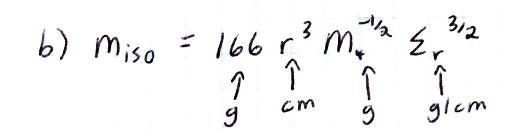

In [ ]:
def calc_isomass(r, M):
  isomasses = []
  for r_i in r:
    isomasses.append(166 * r_i**3 * M**(-1/2) * calc_sigma(r_i.to(u.AU))**(3/2))
  return isomasses

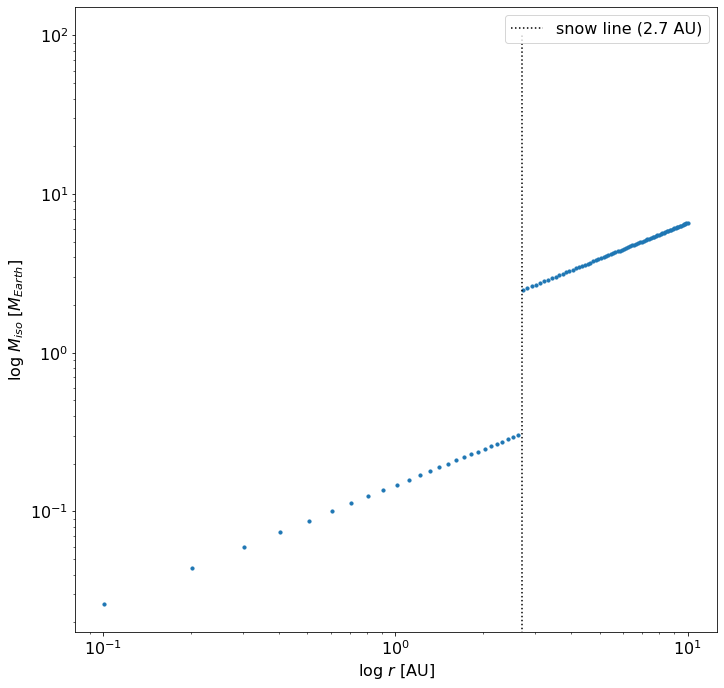

In [ ]:
radii = u.AU * np.linspace(0,10,100)[1:]  # 0 to 10 AU, cut out 0 AU though
isomasses = calc_isomass(radii,M)
isomasses = [isomasses_i.to(u.M_earth) for isomasses_i in isomasses]

plt.rcParams["figure.figsize"] = [11.50, 11.50]
plt.rcParams.update({'font.size': 16})
fig = plt.figure()

plt.scatter(radii, isomasses*u.M_earth, s=10)
plt.vlines(2.7, 0, 100, linestyles='dotted', label='snow line (2.7 AU)')
plt.xlabel('log $r$ [AU]')
plt.ylabel('log $M_{iso}$ [$M_{Earth}$]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Question 3c:

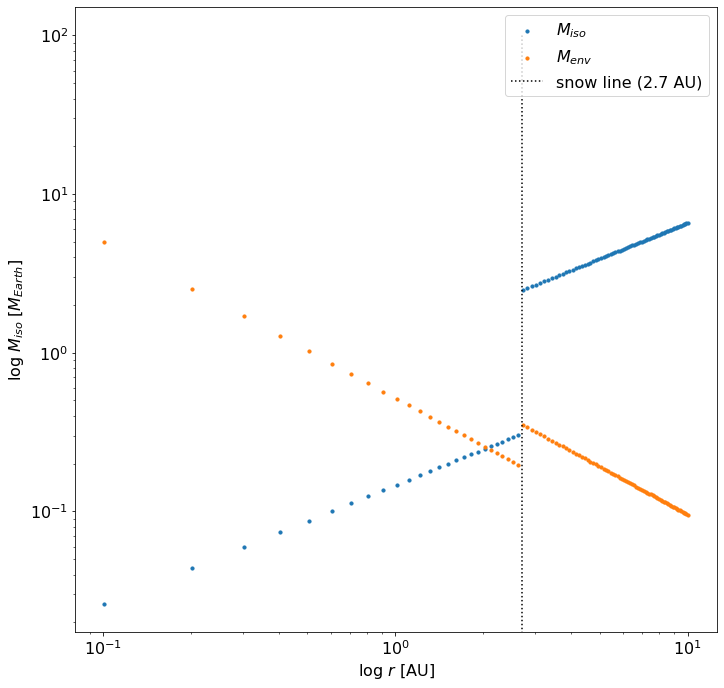

In [ ]:
def calc_Tdisk(r):
  T4 = 6e9 * (r / u.AU)**(-3) * (u.K)**4
  return T4**(1/4)

def calc_envmass(r):
#  return 1.6e-6 * (rho)**(-1/2) * (Tdisk)**(3/2) * (np.log(2 * rho * r / calc_sigma(r)))**(3/2)
  rho_terrestrial = 5.5 * u.g / u.cm**3  # Earth-like density (rocky)
  rho_icy = 1.2 * u.g / u.cm**3  # Mimas-like density (icy)
  envmasses = []
  for r_i in r:
    if (r_i < r_SL) & (r_i > 0):
      envmasses.append(1.6e-6 * (rho_terrestrial / u.g * u.cm**3)**(-1/2) * (calc_Tdisk(r_i) / u.K)**(3/2) * (np.log(2 * rho_terrestrial * r_i / calc_sigma(r_i)))**(3/2) * consts.M_earth)
    elif (r_i >= r_SL):
      envmasses.append(1.6e-6 * (rho_icy / u.g * u.cm**3)**(-1/2) * (calc_Tdisk(r_i) / u.K)**(3/2) * (np.log(2 * rho_icy * r_i / calc_sigma(r_i)))**(3/2) * consts.M_earth)
#  for r_i in r:
#    envmasses.append(1.6e-6 * (rho)**(-1/2) * (calc_Tdisk(r))**(3/2) * (np.log(2 * rho * r / calc_sigma(r)))**(3/2))
  return envmasses

radii = u.AU * np.linspace(0,10,100)[1:]  # 0 to 10 AU, cut out 0 AU though
envmasses = calc_envmass(radii)
envmasses = [envmasses_i.to(u.M_earth) for envmasses_i in envmasses]

plt.rcParams["figure.figsize"] = [11.50, 11.50]
plt.rcParams.update({'font.size': 16})
fig = plt.figure()

plt.scatter(radii, isomasses*u.M_earth, s=10, label='$M_{iso}$')
plt.scatter(radii, envmasses*u.M_earth, s=10, label='$M_{env}$')
plt.vlines(2.7, 0, 100, linestyles='dotted', label='snow line (2.7 AU)')
plt.xlabel('log $r$ [AU]')
plt.ylabel('log $M_{iso}$ [$M_{Earth}$]')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

## Question 3d:

Isolation mass refers to the mass at which pebble accretion virtually ceases for a planetesimal, while envelope mass refers to the minimum mass required for a significant atmosphere to develop. Per this plot, planets that form closer to the Sun have a high mass threshold for gas accretion combined with a low isolation mass, leading them to develop as rocky planets without substantial gaseous envelopes. The threshold for atmospheric accretion is much smaller for the outer planets, and their isolation mass is much higher, allowing them to develop into gas giants.